# <b>Project Name: Customer Segmentation </b>

## Project Sub-title: Clustering Model

### Project Date: Oct 28, 2024

# Table of Contents


**1. Business Understanding** 

    1.1 Problem Description  
    1.2 Project Objective

**2. Data Understanding**

    2.1 Data Source  
    2.2 Exploratory Data Analysis
        2.1.1 Textual EDA
        2.2.2 Visual EDA

**3. Data Preprocessing**

    3.1 Data Cleaning  
    3.2 Data Transformation

**4. Model Development and Evaluation**

    4.1 K-Means Clustering (Default Parameters)
    4.2 K-Means (Refined Parameters)
       
**5. Result Visualization and Insights**

    5.1 Scatter Plots 2D
    5.1 Scatter Plots 3D
    5.3 Target Customer list for Marketing Strategy


        

# 1. Business Understanding

## 1.1. Problem Description

**`Problem Statement:`**

`In business term:`   You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score. You want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.


`In analytical term:`  This is an Unsupervised Clustering Problem. To Build a Clustering machine learning model to identify various customer segments.



## 1.2. Project Objective

The goal of this project is to segment customers based on their profile like age, income, spending etc. Such a model can help in planning marketing strategy by the marketing team for target customers identified through customer segmentation. ML models can uncover new customer segments, leading to increase in profits for the business.

# 2. Data Understanding


## 2.1. Data Source

https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

**`Dataset Description:`**

The Dataset contains following 5 fields-

1. **CustomerID** - This is a unique number assigned to each customer.
2. **Gender** - Male/Female
3. **Age** - Age of Customer
4. **Annual Income (k$)** - Annuual Income of customer
5. **Spending Score (1-100)** - Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Load the Mall Customers Dataset
data_path = 'datasets/Mall_customers.csv'
df = pd.read_csv(data_path)

# Display the first few rows
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
df.tail()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


## 2.2. Exploratory Data Analysis

### 2.2.1. Text EDA : Descriptive Statistics

In [3]:
df.shape

(200, 5)

There are 200 observations/data points with 5 features for each observation.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
numerical_cols = df.select_dtypes(include=["int64","float64"]).columns
print('Numerical Columns in the dataset are:')
print(numerical_cols,'\n')

categorical_cols = df.select_dtypes(include="object").columns
print('Categorical Columns in the dataset are:')
print(categorical_cols)


Numerical Columns in the dataset are:
Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object') 

Categorical Columns in the dataset are:
Index(['Gender'], dtype='object')


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df['Gender'].value_counts()


Gender
Female    112
Male       88
Name: count, dtype: int64

### 2.2.2 Visual EDA : Data Visualizations

**`Univariate Plots`**

Distributions of Numerical Variables - Age, Income and Spending using Histograms 

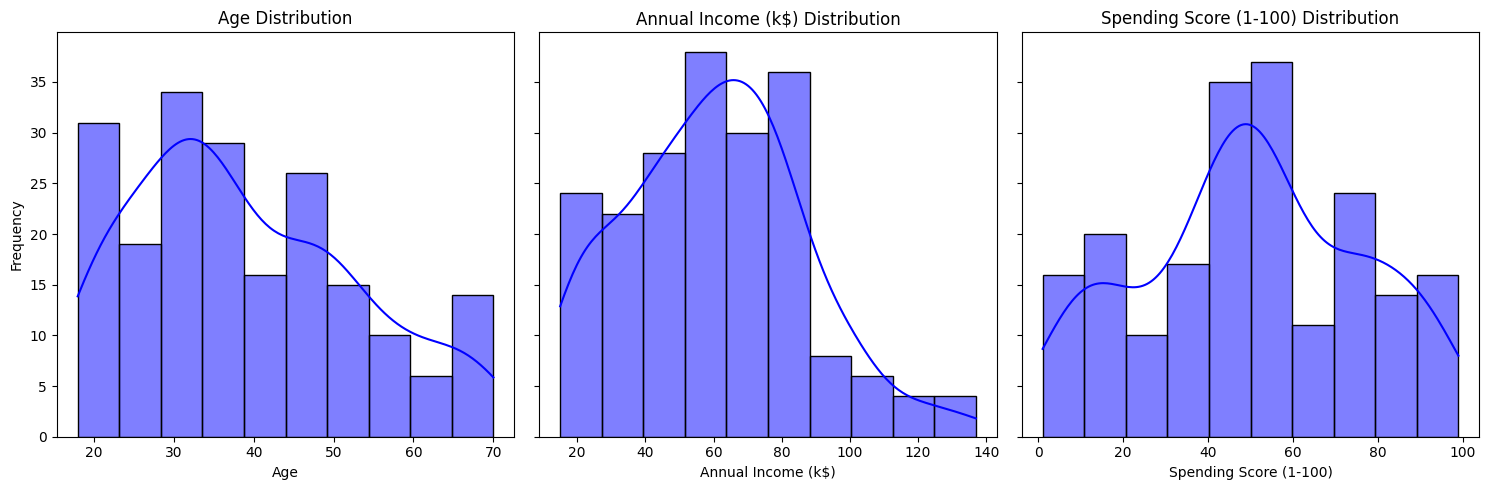

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 1x3 grid of histograms
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# List of columns to plot
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Plot each column in the grid
for i, col in enumerate(columns):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i], color='blue', bins=10)
    axes[i].set_title(f'{col} Distribution')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


**Observations-**

1. Spending Score (1-100):
The distribution appears approximately normal, as the curve is symmetric around the mean, and the histogram aligns with the bell shape.

2. Annual Income (k$):
The distribution is right-skewed (positively skewed), meaning most of the data points are concentrated on the lower end, and the tail stretches towards higher values.

3. Age:
The distribution of Age is slightly uniform to right-skewed, with a more even spread but some higher frequency in younger ages (lower range). It leans slightly towards the lower end.

**`Bivariate Plots`**

**Boxplot**

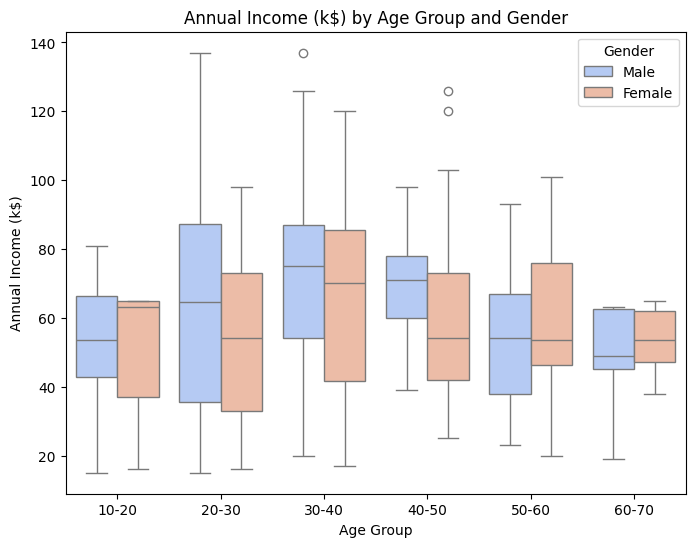

In [9]:
# Create age groups
df['Age Group'] = pd.cut(df['Age'], bins=[10, 20, 30, 40, 50, 60, 70], labels=['10-20', '20-30', '30-40', '40-50', '50-60', '60-70'])

# Boxplot for Age Group vs Spending Score
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Age Group', y='Annual Income (k$)', hue='Gender', palette='coolwarm')
plt.title('Annual Income (k$) by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Annual Income (k$)')
plt.legend(title='Gender')
plt.show()


1. In Younger Groups b/w 20 and 50 the median income for males is significantly higher than females.
2. In Older Groups b/w 50 and 70 the median income for males and females becomes more similar, with the gap narrowing.


**Swarm Plot**

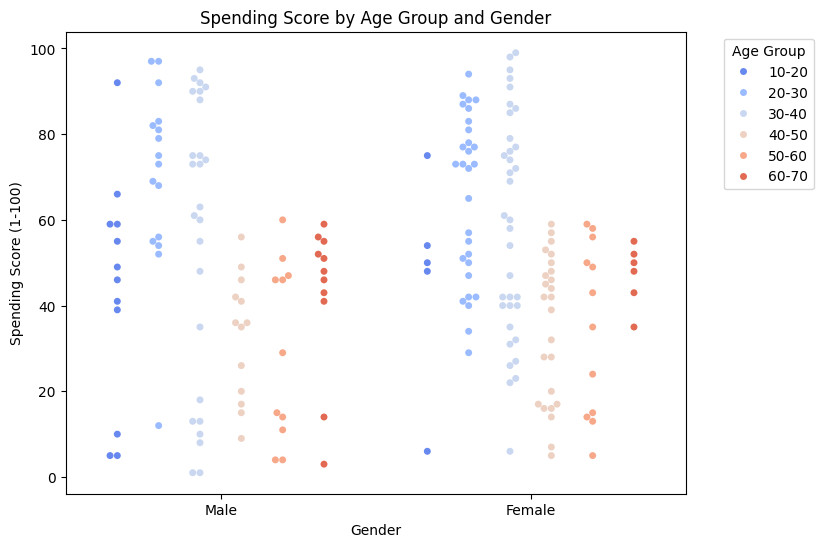

In [10]:
plt.figure(figsize=(8, 6))
sns.swarmplot(data=df, x='Gender', y='Spending Score (1-100)', hue='Age Group', palette='coolwarm', dodge=True)
plt.title('Spending Score by Age Group and Gender')
plt.xlabel('Gender')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


1. Younger age group (20-40) have the highest spending scores. This makes them the most active spenders.
2. Older age group (40-70) have comapratively a much lower spending score than younger age group.


**`Multivariate Plots`**

**Correlation Heatmap**

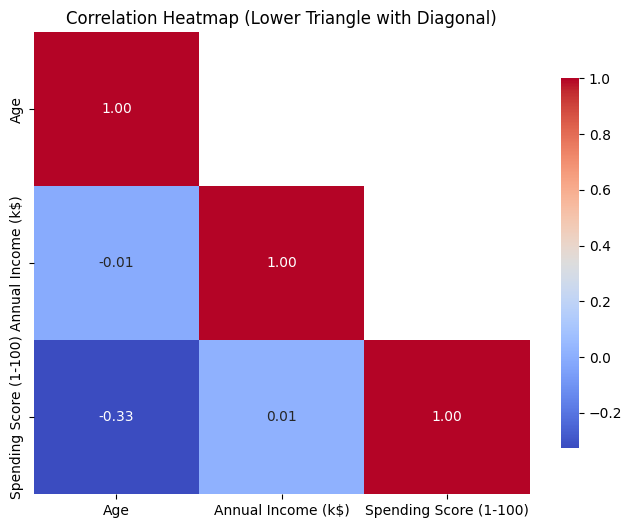

In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()

# Create a mask for the upper triangle (excluding the diagonal)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)

# Plot the heatmap with the mask applied
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('Correlation Heatmap (Lower Triangle with Diagonal)')
plt.show()


**Observations**

1. There is a moderate negative correlation between Age and Spending Score. This suggests that younger customers tend to have higher spending scores, while older customers are likely to have lower spending scores.
2. There is no significant correlation between Age and Annual Income. This implies that income is independent of the age of the customers in this dataset.
3. There is no significant correlation between Annual Income and Spending Score. Customers' spending habits are not directly related to their income levels.

In [12]:
# Since df['Age Group'] was defined only for visualization purpose, we delete this column from dataset.

df = df.drop(columns=['Age Group'])


# 3. Data Pre-Processing


## 3.1. Data Cleaning

**`Handle Null Values`**

In [13]:
null_values_df = df.isnull().sum().to_frame(name='null_count')
null_values_df['null percent']= round(df.isnull().sum()/len(df)*100,2)
null_values_df

,null_count,null percent
CustomerID,0,0.0
Gender,0,0.0
Age,0,0.0
Annual Income (k$),0,0.0
Spending Score (1-100),0,0.0


Since there are no null values in dataset, no action required here.

**`Handle Duplicate Values`**

In [14]:
# Count of duplicate rows (both first and subsequent occurrences)
all_duplicates = df[df.duplicated(keep=False)]
duplicate_count = df.duplicated(keep=False).sum()
print(f"Number of duplicate rows: {duplicate_count}")
print(all_duplicates)

Number of duplicate rows: 0
Empty DataFrame
Columns: [CustomerID, Gender, Age, Annual Income (k$), Spending Score (1-100)]
Index: []


Since there are no duplicate values in dataset, no action required here.

**`Handle Outliers: Statistical Method, IQR-based detection`**

In [15]:
# Step 1: Select only numeric columns for quantile calculation
numeric_df = df.select_dtypes(include=['number'])

Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR)))

# Add a column to mark rows with any outliers
outliers['Outlier Row'] = outliers.any(axis=1)

# Filter out rows with outliers from the original DataFrame
outlier_rows = df[outliers['Outlier Row']]

print("Rows with Outliers:")
print(outlier_rows)
print("\nOutlier Columns in Each Row:")
print(outliers[outliers['Outlier Row']].drop(columns=['Outlier Row']))


Rows with Outliers:
     CustomerID Gender  Age  Annual Income (k$)  Spending Score (1-100)
198         199   Male   32                 137                      18
199         200   Male   30                 137                      83

Outlier Columns in Each Row:
     CustomerID    Age  Annual Income (k$)  Spending Score (1-100)
198       False  False                True                   False
199       False  False                True                   False


In [16]:
# Keep only rows where 'Outlier Row' is False
df_without_outliers = df[~outliers['Outlier Row']]

print("DataFrame without Outliers:")
df_without_outliers


DataFrame without Outliers:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
193,194,Female,38,113,91
194,195,Female,47,120,16
195,196,Female,35,120,79
196,197,Female,45,126,28


Since 2 rows of outliers are removed so we have remaning 198 rows from original dataset of 200 rows.

**`Remove Irrelevant Columns from Dataframe`**

CustomerID is a unique identifier that does not provide meaningful information about the relationships between data points. For Clustering algorithm K-Means relies on patterns in the features to create clusters, and including CustomerID can introduce noise. So we drop this column.

In [17]:
df_cleaned = df.drop(columns=['CustomerID'])
df_cleaned.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


## 3.2. Data Transformation

**`Encoding for categorical features`**

In [18]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_cleaned['Gender_Encoded'] = label_encoder.fit_transform(df_cleaned['Gender'])  # Encode Gender

**`Scale Data`**

In [19]:
from sklearn.preprocessing import StandardScaler

# Select relevant features
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
scaler = StandardScaler()
df_cleaned[features] = scaler.fit_transform(df_cleaned[features])
df_cleaned[0:2]

,Gender,Age,Annual Income (k$),Spending Score (1-100),Gender_Encoded
0,Male,-1.424569,-1.738999,-0.434801,1
1,Male,-1.281035,-1.738999,1.195704,1


**`Remove Irrelevant Columns before algorithmic application`**

While Gender is encoded into numerical values (e.g., Male=1 and Female=0), these numerical values do not represent actual magnitudes or distances. K-Means uses Euclidean distance to determine the closeness of data points, and treating encoded categorical data as numeric can lead to incorrect or biased clustering. So we drop these columns.





In [20]:
df_cleaned = df_cleaned.drop(columns=['Gender', 'Gender_Encoded'])

df_cleaned[0:2]


,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704


# 4. Model Development


## 4.1. Model with Default Configuration

Building K-Means Clustering model with default configurations and checking Silhoutte score

In [21]:
from sklearn.cluster import KMeans

# Create KMeans object
kmeans = KMeans()

# Print all default parameters
print(kmeans.get_params())


{'algorithm': 'lloyd', 'copy_x': True, 'init': 'k-means++', 'max_iter': 300, 'n_clusters': 8, 'n_init': 'warn', 'random_state': None, 'tol': 0.0001, 'verbose': 0}


In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Step 1: Build the model with default number of clusters (n_clusters=8)
model = KMeans(random_state=42)  # Default n_clusters=8
model.fit(df_cleaned)

# Step 2: Predict the clusters and calculate silhouette score
pred = model.predict(df_cleaned)
silhouette_default = silhouette_score(df_cleaned, pred)

# Step 3: Print the silhouette score
print(f"Silhouette Score with Default n_clusters=8: {silhouette_default}")


Silhouette Score with Default n_clusters=8: 0.4082067042807375


/Users/sylvia/opt/anaconda3/envs/tf_dl/ML/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Using the Elbow Method to find the optimal number of Clusters

/Users/sylvia/opt/anaconda3/envs/tf_dl/ML/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sylvia/opt/anaconda3/envs/tf_dl/ML/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sylvia/opt/anaconda3/envs/tf_dl/ML/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sylvia/opt/anaconda3/envs/tf_dl/ML/lib/python3.8/site-packages/sklearn/cluster/_kmeans.

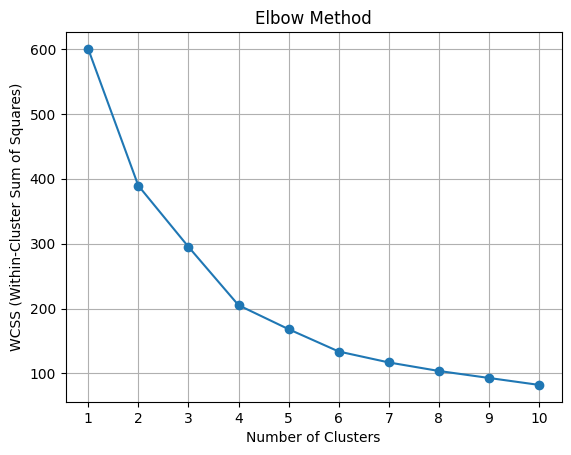

In [23]:
from sklearn.cluster import KMeans

# Calculate WCSS for different cluster numbers
wcss = []
for k in range(1, 11):   # Test 1 to 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_cleaned)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.xticks(range(1, 11))
plt.grid()
plt.show();

The optimal number of clusters appears to be 6 as per the above graph. 

Verify Elbow Method k (number of clusters) selection of 6 by further calculating the Silhoutte Score.

/Users/sylvia/opt/anaconda3/envs/tf_dl/ML/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sylvia/opt/anaconda3/envs/tf_dl/ML/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sylvia/opt/anaconda3/envs/tf_dl/ML/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sylvia/opt/anaconda3/envs/tf_dl/ML/lib/python3.8/site-packages/sklearn/cluster/_kmeans.

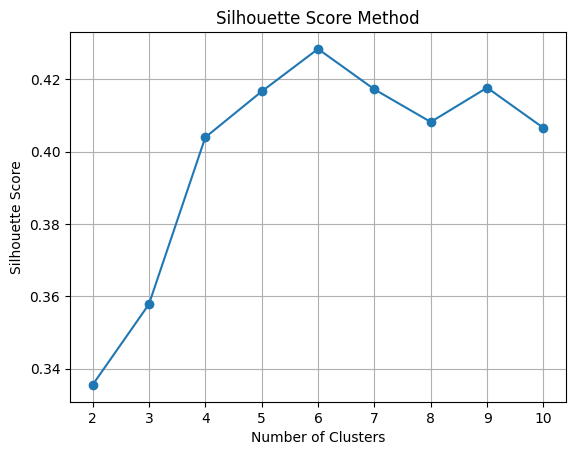

In [24]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 11):  # Silhouette requires at least 2 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_cleaned)
    score = silhouette_score(df_cleaned, kmeans.labels_)
    silhouette_scores.append(score)

# Plot Silhouette Scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()


The Silhoutte Score also gives highest score of about 0.43 at k=6 hence we apply K-Means Clustering with K=6.

## 4.2. Model with refined parameters

After applying K_Means Clustering one more column will be added to the dataframe which is named as 'Cluster' and shows the Cluster number to which each observation is allocated. 

In [25]:
# Apply K-Means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(df_cleaned)

# Add the cluster labels to your dataset
df_cleaned['Cluster'] = kmeans.labels_

# Get cluster centers
centers = kmeans.cluster_centers_

# Display the first few rows with cluster labels
print(df_cleaned.head())


        Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0 -1.424569           -1.738999               -0.434801        4
1 -1.281035           -1.738999                1.195704        4
2 -1.352802           -1.700830               -1.715913        5
3 -1.137502           -1.700830                1.040418        4
4 -0.563369           -1.662660               -0.395980        5


/Users/sylvia/opt/anaconda3/envs/tf_dl/ML/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [26]:
print(df_cleaned.tail())


          Age  Annual Income (k$)  Spending Score (1-100)  Cluster
195 -0.276302            2.268791                1.118061        3
196  0.441365            2.497807               -0.861839        2
197 -0.491602            2.497807                0.923953        3
198 -0.491602            2.917671               -1.250054        2
199 -0.635135            2.917671                1.273347        3


# 5. Result Visualization and Insights


## 5.1 Visualize Clusters in 2D based on Annual Income and Spending Score

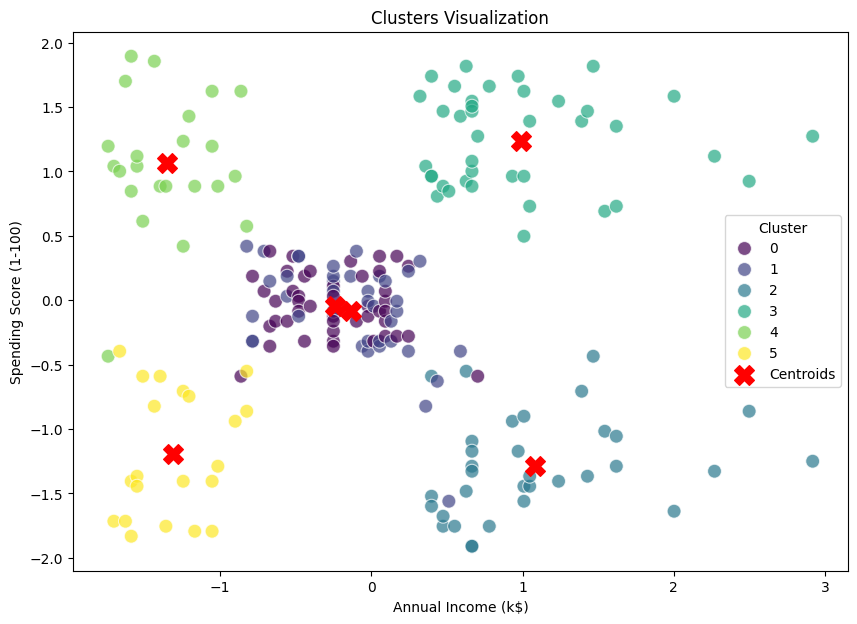

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select two features for visualization
x_feature = 'Annual Income (k$)'
y_feature = 'Spending Score (1-100)'

# Create a scatter plot
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=df_cleaned, 
    x=x_feature, 
    y=y_feature, 
    hue='Cluster', 
    palette='viridis', 
    s=100, 
    alpha=0.7
)

# Plot cluster centers
centers_df = pd.DataFrame(centers, columns=df_cleaned.columns[:-1])  # Exclude 'Cluster' column
plt.scatter(
    centers_df[x_feature], 
    centers_df[y_feature], 
    c='red', 
    s=200, 
    marker='X', 
    label='Centroids'
)

plt.title('Clusters Visualization')
plt.legend(title='Cluster')
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.show()


## 5.2 Visualize Clusters in 2D based on Age and Spending Score

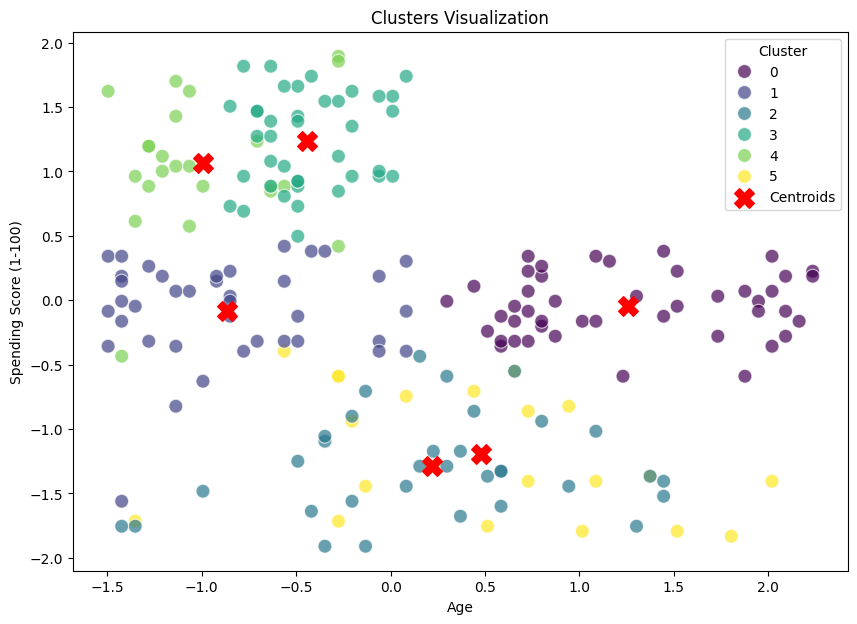

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select two features for visualization
x_feature = 'Age'
y_feature = 'Spending Score (1-100)'

# Create a scatter plot
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=df_cleaned, 
    x=x_feature, 
    y=y_feature, 
    hue='Cluster', 
    palette='viridis', 
    s=100, 
    alpha=0.7
)

# Plot cluster centers
centers_df = pd.DataFrame(centers, columns=df_cleaned.columns[:-1])  # Exclude 'Cluster' column
plt.scatter(
    centers_df[x_feature], 
    centers_df[y_feature], 
    c='red', 
    s=200, 
    marker='X', 
    label='Centroids'
)

plt.title('Clusters Visualization')
plt.legend(title='Cluster')
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.show()


**So based on the above two plots we can identify 6 clusters-**

- **Cluster0 (Purple)** - Customers with medium income and medium spending score (Old age)
- **Cluster1 (Blue)** - Customers with medium income and medium spending score (Young age)
- <font color=blue>**Cluster2 (Cyan)** - Customers with high income and low spending score (Mixed Age) ---> Target Customers
- **Cluster3 (Dark green)** - Customers with high income and high spending score (Young age)
- **Cluster4 (Light green)** - Customers with low income and high spending score (Young Age)
- **Cluster5 (Yellow)** - Customers with low income and low spending score (Young age)




Based on above observations customers with high income and low spending score are target customers.

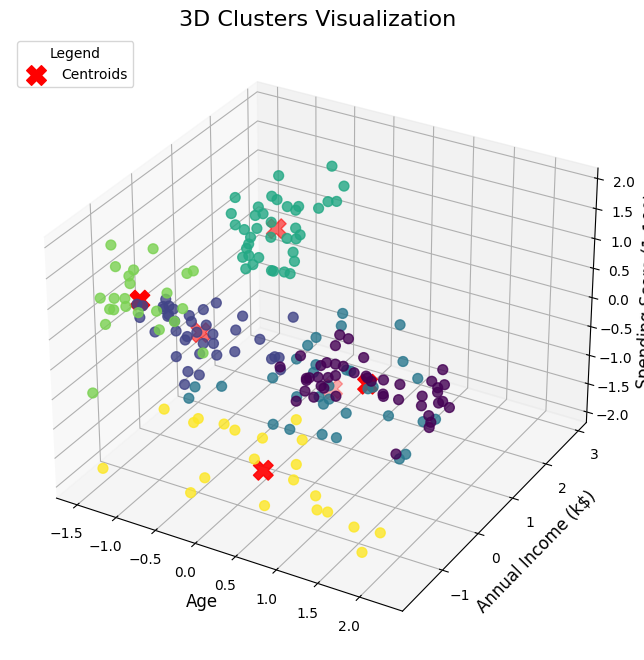

In [29]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define the three features for visualization
x_feature = 'Age'
y_feature = 'Annual Income (k$)'
z_feature = 'Spending Score (1-100)'

# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for the clusters
scatter = ax.scatter(
    df_cleaned[x_feature], 
    df_cleaned[y_feature], 
    df_cleaned[z_feature], 
    c=df_cleaned['Cluster'], 
    cmap='viridis', 
    s=50, 
    alpha=0.8
)

# Plot the cluster centers
centers_df = pd.DataFrame(centers, columns=df_cleaned.columns[:-1])  # Exclude 'Cluster' column
ax.scatter(
    centers_df[x_feature], 
    centers_df[y_feature], 
    centers_df[z_feature], 
    c='red', 
    s=200, 
    marker='X', 
    label='Centroids'
)

# Set plot labels and title
ax.set_title('3D Clusters Visualization', fontsize=16)
ax.set_xlabel(x_feature, fontsize=12)
ax.set_ylabel(y_feature, fontsize=12)
ax.set_zlabel(z_feature, fontsize=12)
ax.legend(title='Legend', loc='upper left')

# Show the plot
plt.show()


## 5.3 Target Customer list for Marketing Strategy


In [30]:
# Extract data for Cluster 2 (target customers)
target_customers = df_cleaned[df_cleaned['Cluster'] == 2]

# Save target customers (Cluster 2) data to a CSV file
target_customers.to_csv('target_customers.csv', index=False)

# Display the first few rows of the target customersß
print(target_customers.head())


          Age  Annual Income (k$)  Spending Score (1-100)  Cluster
126  0.297832            0.398489               -0.590088        2
128  1.446099            0.398489               -1.521805        2
130  0.584899            0.398489               -1.599448        2
134 -1.352802            0.474828               -1.754735        2
136  0.369598            0.474828               -1.677091        2


Mapping to Original Data for Cluster 2 Target customers

In [31]:
# Assuming 'df_without_outliers' is the unscaled dataset without outliers
# And 'df_cleaned' is the scaled dataset with the 'Cluster' column

# Add cluster labels from the scaled dataset to the unscaled dataset
df_without_outliers['Cluster'] = df_cleaned['Cluster']

# Extract rows belonging to Cluster 2
cluster_2_customers = df_without_outliers[df_without_outliers['Cluster'] == 2]

# Save the original data for Cluster 2 to a CSV file
cluster_2_customers.to_csv('cluster_2_customers.csv', index=False)

# Display the first few rows of Cluster 2 data
print(cluster_2_customers.head())


     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
126         127    Male   43                  71                      35   
128         129    Male   59                  71                      11   
130         131    Male   47                  71                       9   
134         135    Male   20                  73                       5   
136         137  Female   44                  73                       7   

     Cluster  
126        2  
128        2  
130        2  
134        2  
136        2  


/var/folders/1j/6bqwtp0x00z_279498pht7ym0000gn/T/ipykernel_33812/1678127796.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_without_outliers['Cluster'] = df_cleaned['Cluster']
